# Examen

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

### Mis respuestas pregunta 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

In [71]:
#Inciso a
from sympy import Symbol
x = Symbol('x')

def y(x): 
    return sin(x)

def z(x):
    return cos(x)

def w(x):
    return 1/(cos(x) + sin(2*x))

In [65]:
#Creo que a forma en la que definí las funciones no es estrictamente usando Simpy, así que aquí va otra forma de hacerlo
y = Function("y")
ey = Eq(y(x), sin(x))

z = Function("z")
ez = Eq(z(x), cos(x))

w = Function("w")
ew = Eq(w(x), 1/(cos(x) + sin(2*x)))

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$


In [66]:
#Inciso b
from sympy import *

def g(x):
    return y(x)*z(x)

g(x)

y(x)*z(x)

In [67]:
diff(g(x), x)

y(x)*Derivative(z(x), x) + z(x)*Derivative(y(x), x)

(c) Grafica $w(x)$ en el rango $[0,1]$

Text(0.5, 1.0, 'Función w(x) en el rango [0,1]')

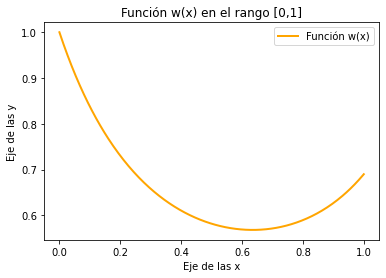

In [90]:
#Inciso c
import numpy as np
import matplotlib.pyplot as plt

EX = np.linspace(0, 1, 300, endpoint= True)
EY = 1/(np.sin(2*EX) + np.cos(EX))
plt.plot(EX,EY, color = "orange", linewidth = 2, linestyle = "-", label = "Función w(x)")
plt.legend(loc='best')
plt.xlabel('Eje de las x')
plt.ylabel('Eje de las y')
plt.title("Función w(x) en el rango [0,1]")

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

In [69]:
#Inciso d
integrate(w(x), x)

Integral(w(x), x)

In [72]:
integrate(w(x), (x, 0, 1))

Integral(1/(sin(2*x) + cos(x)), (x, 0, 1))

In [73]:
#Cambiamos a la derivada de g(x)
integrate(g(x), x)

sin(x)**2/2

In [74]:
integrate(g(x), (x, 0, 1))

sin(1)**2/2

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [75]:
#Inciso e
print("Cuando la x tiende a cero la función y(x)=", y(x), "tiende a", limit(y(x), x, 0))

Cuando la x tiende a cero la función y(x)= sin(x) tiende a 0


In [76]:
print("Cuando la x tiende a cero la función z(x)=", z(x), "tiende a", limit(z(x), x, 0))

Cuando la x tiende a cero la función z(x)= cos(x) tiende a 1


In [77]:
print("Cuando la x tiende a cero la función g(x)=", g(x), "tiende a", limit(g(x), x, 0))

Cuando la x tiende a cero la función g(x)= sin(x)*cos(x) tiende a 0


In [78]:
print("Cuando la x tiende a cero la función w(x)=", w(x), "tiende a", limit(w(x), x, 0))

Cuando la x tiende a cero la función w(x)= 1/(sin(2*x) + cos(x)) tiende a 1


(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [79]:
#Inciso f
#Expansión de y(x)
ey.rhs.series(x, 0, n=3) #rhs = right hand side para tomar lo que está a la derecha de la función y(x)

x + O(x**3)

In [80]:
ez.rhs.series(x, 0, n=3) 

1 - x**2/2 + O(x**3)

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

### Mis respuestas pregunta 2

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [88]:
#Inciso a
#La verdad ando medio perdida pero si algo se es que en la vida se empieza definiendo lo que vas a usar
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [91]:
#Estoy intentado hacer lo que hicimos en clase con el pendulo, pero me doy cuenta queee no hace mucho sentido porque aquí todo depende de t nada más

#class AtractorRossel: 
    
#    def __init__(self):
 #       self.tiempo = tiempo

In [ ]:
#OKAY NO, ya leí mucho y entiendo a medias conceptualmente lo que debo de hacer pero no se bien cómo hacerlo.

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

In [92]:
from mpl_toolkits.mplot3d import Axes3D